170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of classes: 10


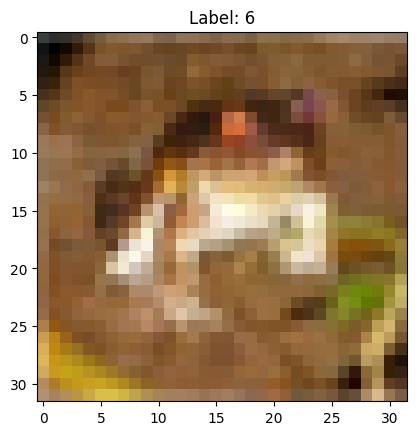

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print the shape of the dataset
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Check the number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Display a sample image
plt.imshow(x_train[0])
plt.title(f'Label: {y_train[0][0]}')
plt.show()


In [2]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for augmenting the training data
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(x_train)


In [4]:
from tensorflow.keras import layers, models

# Create a Sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Set the number of epochs
epochs = 20

# Train the model using the data generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 64)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.2647 - loss: 1.9546 - val_accuracy: 0.4622 - val_loss: 1.4852
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3438 - loss: 1.8838

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.3438 - loss: 1.8838 - val_accuracy: 0.4764 - val_loss: 1.4498
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.4260 - loss: 1.5839 - val_accuracy: 0.4932 - val_loss: 1.4671
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.4844 - loss: 1.5988 - val_accuracy: 0.5252 - val_loss: 1.3483
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.4755 - loss: 1.4543 - val_accuracy: 0.5814 - val_loss: 1.1697
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.4375 - loss: 1.4587 - val_accuracy: 0.5831 - val_loss: 1.1767
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.5118 - loss: 1.3611 - val_accuracy: 0.5787 - val_loss: 1.1671
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.5156 - loss: 1.3009 - val_accuracy: 0.5778 - val_loss: 1.1692
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5363 - loss: 1.3031 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6721 - loss: 0.9384
Test accuracy: 0.6675


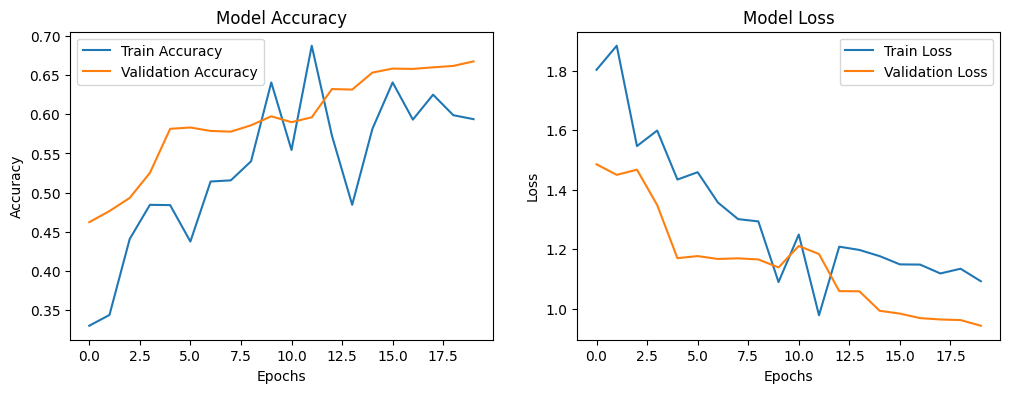

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [7]:
# Save the trained model
model.save('cifar10_classifier.keras')



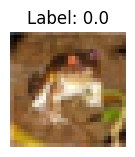

In [8]:
import matplotlib.pyplot as plt

# Display the image at its original resolution
plt.figure(figsize=(1.5, 1.5))  # Keep the figure size small to avoid pixelation
plt.imshow(x_train[0])
plt.title(f'Label: {y_train[0][0]}')
plt.axis('off')  # Optional: Turn off axis for a cleaner look
plt.show()


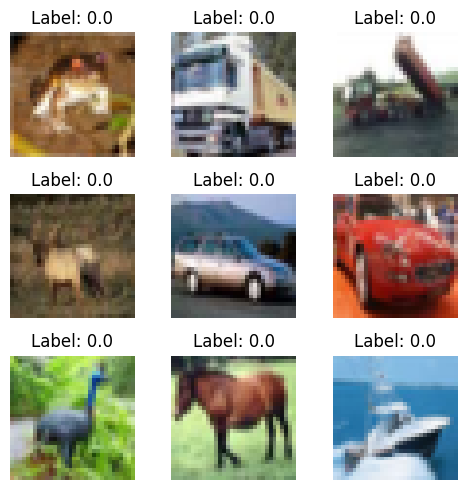

In [9]:
import matplotlib.pyplot as plt

# Display a grid of 9 images from the dataset
plt.figure(figsize=(5, 5))  # Increase figure size for multiple images

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i][0]}')
    plt.axis('off')  # Turn off axis for clarity

plt.tight_layout()
plt.show()


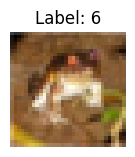

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display a single image with a small figure size to avoid pixelation
plt.figure(figsize=(1.5, 1.5))  # Small figure size to retain clarity
plt.imshow(x_train[0])
plt.title(f'Label: {y_train[0][0]}')
plt.axis('off')  # Turn off axis for a cleaner display
plt.show()


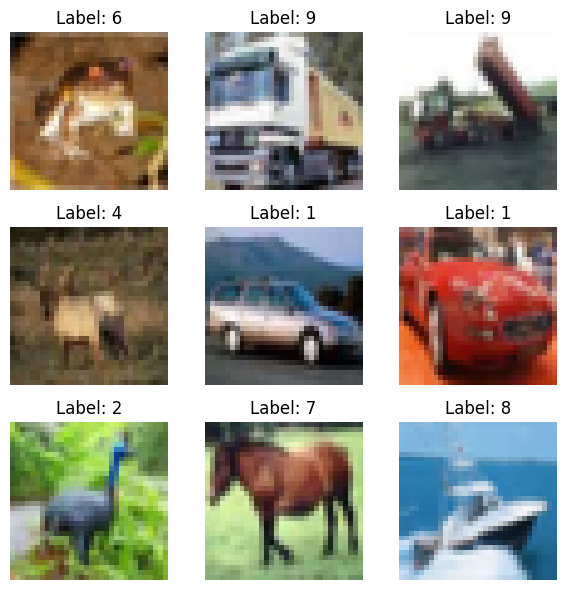

In [11]:
# Display a grid of 9 images from the dataset with optimized figure size
plt.figure(figsize=(6, 6))  # Larger figure size for displaying multiple images

for i in range(9):  # Loop to display 9 images in a 3x3 grid
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i][0]}')
    plt.axis('off')  # Turn off axis for clarity

plt.tight_layout()  # Automatically adjust subplots to fit into figure area
plt.show()


In [12]:
!pip install scikit-image


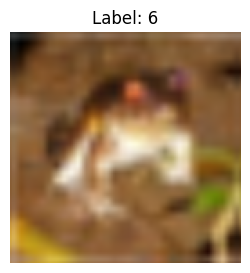

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from skimage.transform import resize

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Upscale the image for better clarity (128x128 instead of 32x32)
upscale_image = resize(x_train[0], (128, 128), anti_aliasing=True)

# Display the upscaled image
plt.figure(figsize=(3, 3))  # Adjust figure size for better clarity
plt.imshow(upscale_image)
plt.title(f'Label: {y_train[0][0]}')
plt.axis('off')  # Turn off axis for a cleaner look
plt.show()


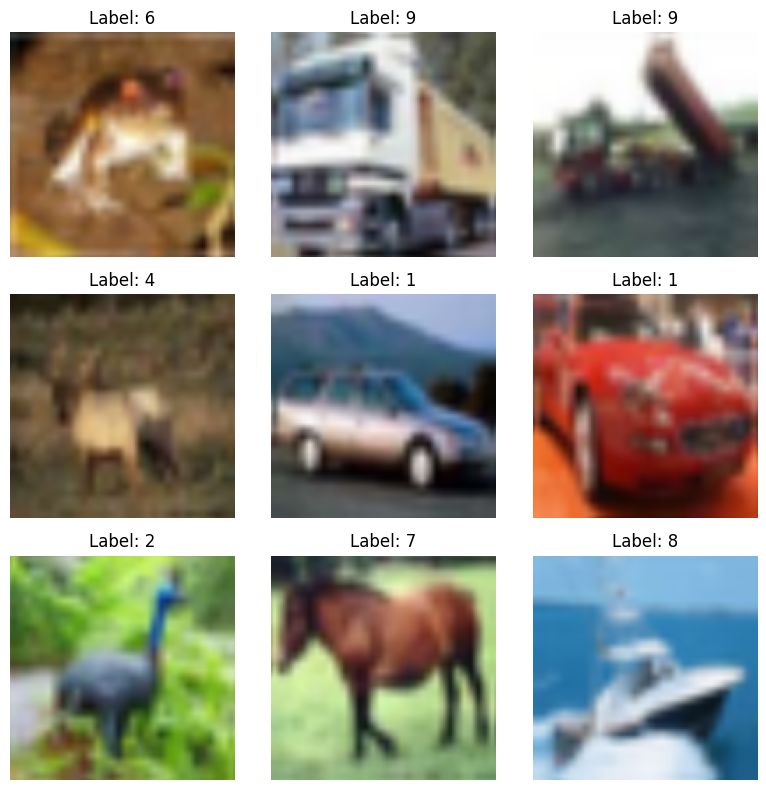

In [14]:
# Display a grid of upscaled images
plt.figure(figsize=(8, 8))  # Larger figure size for multiple upscaled images

for i in range(9):  # Display 9 images in a 3x3 grid
    upscale_image = resize(x_train[i], (128, 128), anti_aliasing=True)
    plt.subplot(3, 3, i+1)
    plt.imshow(upscale_image)
    plt.title(f'Label: {y_train[i][0]}')
    plt.axis('off')

plt.tight_layout()  # Automatically adjust subplots to fit the figure area
plt.show()
